### Μηχανική Μάθηση
#### 1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



Ονοματεπώνυμο φοιτητή: Χαρίδημος Παπαδάκης

Α.Μ.: 03120022

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1_ndkaT6BoDuxxPPxLWq-oKDJqzO1Dlhg/view?usp=sharing) .


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [34]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = '/content/drive/My Drive/train-val.csv'

train_val_data = pd.read_csv(file_path)

print(train_val_data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   id        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   1  2009-03-04   Albury     13.8     22.1       0.2          NaN       NaN   
1   2  2009-03-05   Albury     11.5     22.0       0.0          NaN       NaN   
2   3  2009-03-09   Albury     13.8     31.8       0.0          NaN       NaN   
3   4  2009-03-10   Albury     15.5     32.0       0.0          NaN       NaN   
4   5  2009-03-11   Albury     18.4     30.5       1.2          NaN       NaN   

  WindGustDir  WindGustSpeed  ... Humidity9am Humidity3pm  Pressure9am  \
0         WNW           57.0  ...        57.0        26.0       1014.5   
1          SW           50.0  ...        60.0        33.0       1013.7   
2         NNE           24.0  ...        49.0        28.0       1019.7   
3          NE           50.0  ...        51.0        25.0       1019.5   
4          NE 

1.β. Φορτώστε το σύνολο δεδομένων "test.csv" στο notebook σας

In [35]:
file_path = '/content/drive/My Drive/test-2.csv'

test_data = pd.read_csv(file_path)

print(test_data.head())


         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  22/03/2009   Albury     14.6     30.0       0.0          NaN       NaN   
1  15/04/2009   Albury     10.7     21.9       0.0          NaN       NaN   
2  21/04/2009   Albury      5.7     21.4       0.0          NaN       NaN   
3  24/04/2009   Albury     10.6     16.2       0.0          NaN       NaN   
4  19/05/2009   Albury      3.7     19.1       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0          NE           37.0          E  ...         19.0         56.0   
1           W           63.0         NW  ...         31.0         44.0   
2         ESE           17.0        ENE  ...          7.0         68.0   
3         WNW           39.0        ESE  ...          4.0         74.0   
4         SSE           19.0        NaN  ...         11.0         87.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         30.0     

### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

Το 2ζ, δηλαδή οι επιπλέον πληροφορίες, είναι ενταγμένες σε διάσπαρτα σημεία.

In [36]:
data_overview = train_val_data.info()

missing_values = train_val_data.isnull().sum()

data_overview, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48423 entries, 0 to 48422
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             48423 non-null  int64  
 1   Date           48423 non-null  object 
 2   Location       48423 non-null  object 
 3   MinTemp        48263 non-null  float64
 4   MaxTemp        48322 non-null  float64
 5   Rainfall       48423 non-null  float64
 6   Evaporation    28039 non-null  float64
 7   Sunshine       25426 non-null  float64
 8   WindGustDir    45302 non-null  object 
 9   WindGustSpeed  45330 non-null  float64
 10  WindDir9am     44602 non-null  object 
 11  WindDir3pm     47095 non-null  object 
 12  WindSpeed9am   48066 non-null  float64
 13  WindSpeed3pm   47566 non-null  float64
 14  Humidity9am    47865 non-null  float64
 15  Humidity3pm    47164 non-null  float64
 16  Pressure9am    43643 non-null  float64
 17  Pressure3pm    43634 non-null  float64
 18  Cloud9

(None,
 id                   0
 Date                 0
 Location             0
 MinTemp            160
 MaxTemp            101
 Rainfall             0
 Evaporation      20384
 Sunshine         22997
 WindGustDir       3121
 WindGustSpeed     3093
 WindDir9am        3821
 WindDir3pm        1328
 WindSpeed9am       357
 WindSpeed3pm       857
 Humidity9am        558
 Humidity3pm       1259
 Pressure9am       4780
 Pressure3pm       4789
 Cloud9am         17890
 Cloud3pm         18981
 Temp9am            226
 Temp3pm            913
 RainToday            0
 RainTomorrow         0
 dtype: int64)

2α) Το πλήθος των δειγμάτων είναι 48423 και το πλήθος των χαρακτηριστικών του συνόλου δεδομένων (των στηλών) είναι 24.

Παρατηρούμε ότι λείπουν σχεδόν οι μισές τιμές από τις στήλες Evaporation, Sunshine, Cloud9am και Cloud3am, αρκετές τιμές από τις στήλες WindGustDir, WindGustSpeed, WindDir9am, και Pressure, ενώ και μερικές ακόμα στήλες έχουν κάποια κενά.

In [37]:
statistical_summary = train_val_data.describe()

target_distribution = train_val_data['RainTomorrow'].value_counts(normalize=True)

statistical_summary, target_distribution


(                 id       MinTemp       MaxTemp      Rainfall   Evaporation  \
 count  48423.000000  48263.000000  48322.000000  48423.000000  28039.000000   
 mean   24212.000000     10.661530     21.468416      2.218592      4.590831   
 std    13978.660379      6.058113      6.557396      7.377476      3.473241   
 min        1.000000     -8.200000     -3.200000      0.000000      0.000000   
 25%    12106.500000      6.500000     16.700000      0.000000      2.200000   
 50%    24212.000000     10.300000     20.700000      0.000000      4.000000   
 75%    36317.500000     14.700000     25.800000      0.800000      6.200000   
 max    48423.000000     29.600000     45.400000    371.000000     68.800000   
 
            Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am  \
 count  25426.000000   45330.000000  48066.000000  47566.000000  47865.000000   
 mean       7.162259      39.097948     13.670162     18.228167     70.574992   
 std        3.607741      14.004819

Σχετικά με την κατανομή των τιμών του στόχου RainTommorow παρατηρούμε ότι υπάρχει μια ανισοκατανομή (77.16% 0 και 22.84% 1). Επίσης, για τις υπόλοιπες αριθμητικές τιμές παίρνουμε μια περιγραφή της κατανομής τους.

In [38]:
train_val_dtypes = train_val_data.dtypes
train_val_dtypes

id                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object

2β) Παραπάνω φαίνονται τα είδη των χαρακτηρηστικών. Τα objects είναι strings

In [ ]:
feature_labels = train_val_data.columns.tolist()
categories_count = {feature: train_val_data[feature].nunique() for feature in feature_labels}
samples_per_category = {feature: train_val_data[feature].value_counts() for feature in feature_labels}
print("Feature Labels\n")
print(feature_labels)
print("\n")
print("Unique values per Feature/Number of Categories\n")
print(categories_count)
print("\n")
print("Samples per Category\n")
print(samples_per_category)


Feature Labels

['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


Unique values per Feature/Number of Categories

{'id': 48423, 'Date': 2534, 'Location': 49, 'MinTemp': 364, 'MaxTemp': 456, 'Rainfall': 443, 'Evaporation': 231, 'Sunshine': 140, 'WindGustDir': 16, 'WindGustSpeed': 61, 'WindDir9am': 16, 'WindDir3pm': 16, 'WindSpeed9am': 40, 'WindSpeed3pm': 42, 'Humidity9am': 101, 'Humidity3pm': 101, 'Pressure9am': 508, 'Pressure3pm': 497, 'Cloud9am': 10, 'Cloud3pm': 9, 'Temp9am': 396, 'Temp3pm': 452, 'RainToday': 2, 'RainTomorrow': 2}


Samples per Category

{'id': 1        1
32287    1
32278    1
32279    1
32280    1
        ..
16144    1
16145    1
16146    1
16147    1
48423    1
Name: id, Length: 48423, dtype: int64, 'Dat

<ipython-input-39-82005626e4dc>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_val_data.corr()


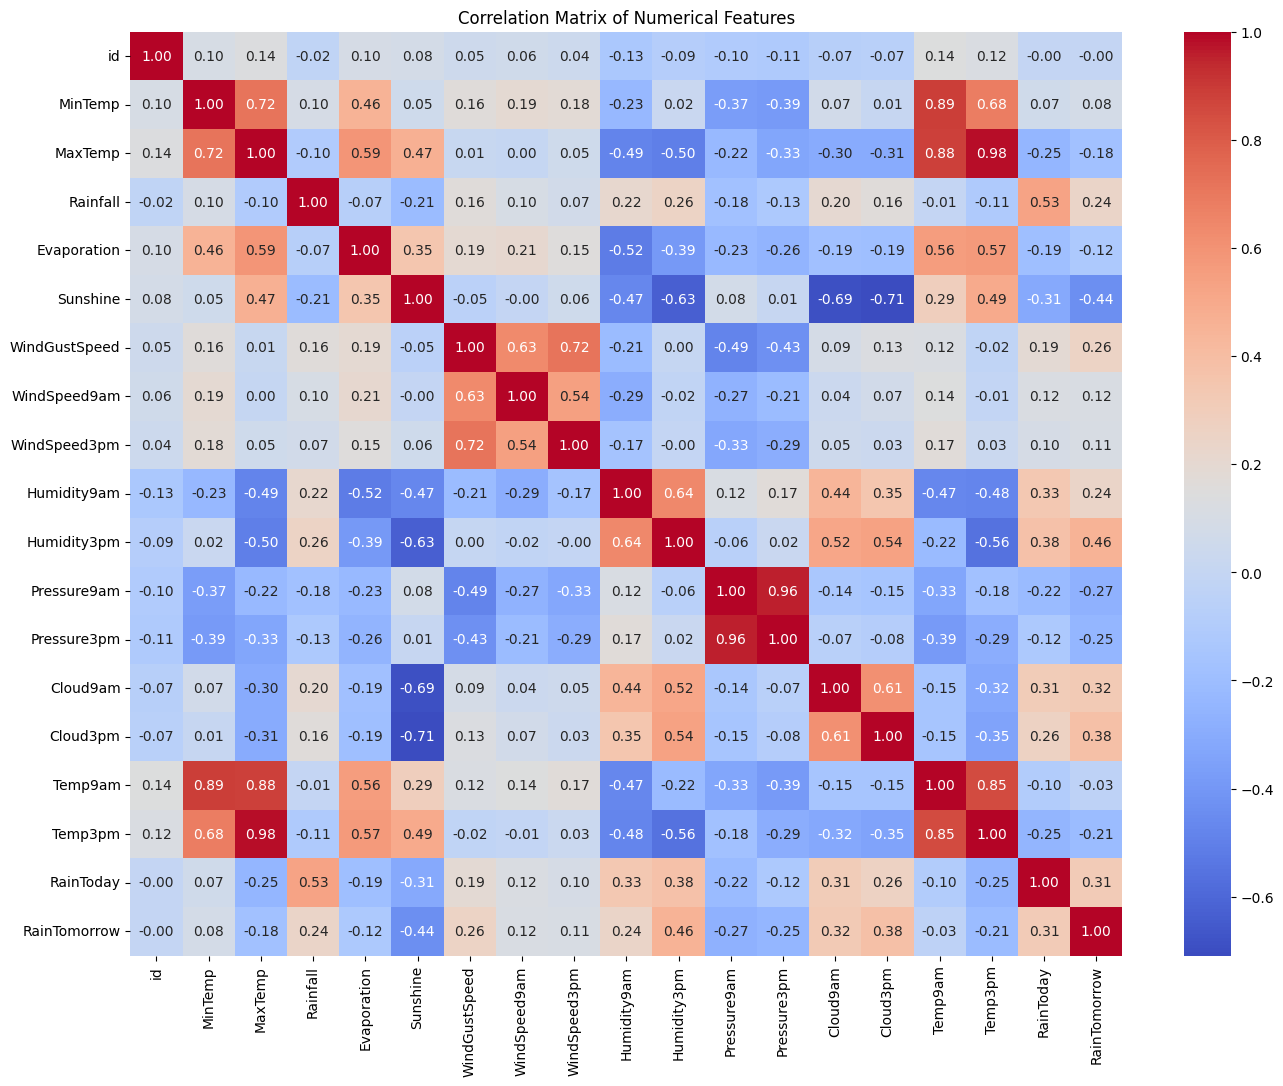

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = train_val_data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Από τον πίνακα συσχέτισης μπορούμε, εκτός των άλλων να συμπεράνουμε πως η βροχόπτωση την επόμενη μέρα έχει ισχυρή θετική συσχέτιση με την Υγρασία, τη Συννεφιά, τη βροχόπτωση την ίδια μέρα και την ταχύτητα του ανέμου, ενώ έχει ισχυρή αρνητική συσχέτιση με την μέγιστη θερμοκρασία, την ηλιοφάνεια και την πίεση.

### 3. Προεπεξεργασία συνόλου δεδομένων
💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


Ο πίνακας συσχέτισης μας δίνει μεγάλη πληροφορία για τα χαρακτηριστικά που θα πρέπει να κρατήσουμε. Συγκεκριμένα παρατγρούμε ότι το 'Temp9am' και το 'MinTemp' έχουν δείκτη συσχέτισης 0.89. Αντίστοιχα το 'Temp3pm' και 'MaxTemp'  έχουν δείκτη συσχέτισης 0.98. Τέλος το 'Pressure9am' και το 'Pressure3pm' έχουν δείκτη συσχέτισης 0.96. Έτσι συμπεραίνουμε ότι αυτές οι 2άδες κατηγοριών μας δίνουν περίπου την ίδια πληροφορία. Συνεπώς θα μπορούσαμε  να αφαιρέσουμε από κάθε τέτοια 2αδα ένα χαρακτηριστικό για να περιορίσουμε το complexity του μοντέλου.

Πιο συγκεκριμένα:
'Temp9am' και 'MinTemp': Το Temp9am έχει χειρότερο correlation με το RainTomorrow οπότε δεν θα κρατήσουμε το χαρακτηριστικό Temp9am

'Temp3pm' και 'MaxTemp': Το Temp3pm έχει καλύτερο correlation με το RainTomorrow οπότε δεν θα κρατήσουμε το χαρακτηριστικό MaxTemp

'Pressure9am' και 'Pressure3pm': Το Presssure9am έχει καλύτερο correlation με το RainTomorrow οπότε δεν θα κρατήσουμε το χαρακτηριστικό Pressure3pm

Επιπλέον δε θα κρατήσουμε το χαρακτηριστικό id γιατί δεν μας προσφέρει κάποια πληροφορία όπως και το feature WindDir, αλλά και θα κρατήσουμε το AverageWindSpeed αντί για τις τιμές του WindSpeed τις δύο διαφορετικές ώρες.

Τέλος, δημιουργούμε τα features DaytimeTempChange και DaytimeHumidityChange που δίνουν την αλλαγή της θερμοκρασίας και της υγρασίας μέσα στην μέρα, και μεγάλες τιμές ενδέχεται να αποτελούν συνηθισμένη περίπτωση σε βροχή, διαγράφουμε το feature Date γιατί δεν έχει κάποια σημαντική πληροφορία και δημιουργούμε το feature HumidityTemp3pm, αφού ο συνδυασμός τον δύο επηρεάζει σημαντικό το ενδεχόμενο βροχής.

In [40]:

file_path = '/content/drive/My Drive/train-val.csv'

train_val_data = pd.read_csv(file_path)

train_val_data.drop('id', axis=1, inplace=True)

train_val_data.drop('Date', axis=1, inplace=True)

train_val_data_reduced = train_val_data.drop(columns=['MaxTemp', 'Pressure3pm'])


train_val_data_reduced['DaytimeTempChange'] = train_val_data['Temp3pm'] - train_val_data['Temp9am']
train_val_data_reduced['HumidityTemp3pm'] = train_val_data_reduced['Humidity3pm'] * train_val_data_reduced['Temp3pm']
train_val_data_reduced['AverageWindSpeed'] = (train_val_data['WindSpeed3pm'] + train_val_data['WindSpeed9am'])/2
train_val_data_reduced['DaytimeHumidityChange'] = train_val_data['Humidity3pm'] - train_val_data['Humidity9am']

train_val_data_reduced.drop(columns=['Temp9am','WindSpeed3pm','WindSpeed9am'],inplace = True)


wind_dir_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}
train_val_data_reduced['WindGustDir_num'] = train_val_data_reduced['WindGustDir'].map(wind_dir_map)



train_val_data_reduced.drop(columns=['WindDir9am', 'WindDir3pm','WindGustDir'],inplace =True)






train_val_data_reduced.head()






,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,DaytimeTempChange,HumidityTemp3pm,AverageWindSpeed,DaytimeHumidityChange,WindGustDir_num
0,Albury,13.8,0.2,NaN,NaN,57.0,57.0,26.0,1014.5,NaN,NaN,21.9,0.0,0.0,6.3,569.4,29.5,-31.0,292.5
1,Albury,11.5,0.0,NaN,NaN,50.0,60.0,33.0,1013.7,NaN,NaN,21.4,0.0,0.0,7.5,706.2,26.0,-27.0,225.0
2,Albury,13.8,0.0,NaN,NaN,24.0,49.0,28.0,1019.7,NaN,NaN,30.5,0.0,0.0,11.9,854.0,11.5,-21.0,22.5
3,Albury,15.5,0.0,NaN,NaN,50.0,51.0,25.0,1019.5,NaN,NaN,30.8,0.0,1.0,10.7,770.0,3.0,-26.0,45.0
4,Albury,18.4,1.2,NaN,NaN,44.0,57.0,23.0,1021.3,NaN,NaN,29.6,1.0,0.0,8.1,680.8,17.0,-34.0,45.0


<ipython-input-41-75e0a880313c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_val_data_reduced.corr()


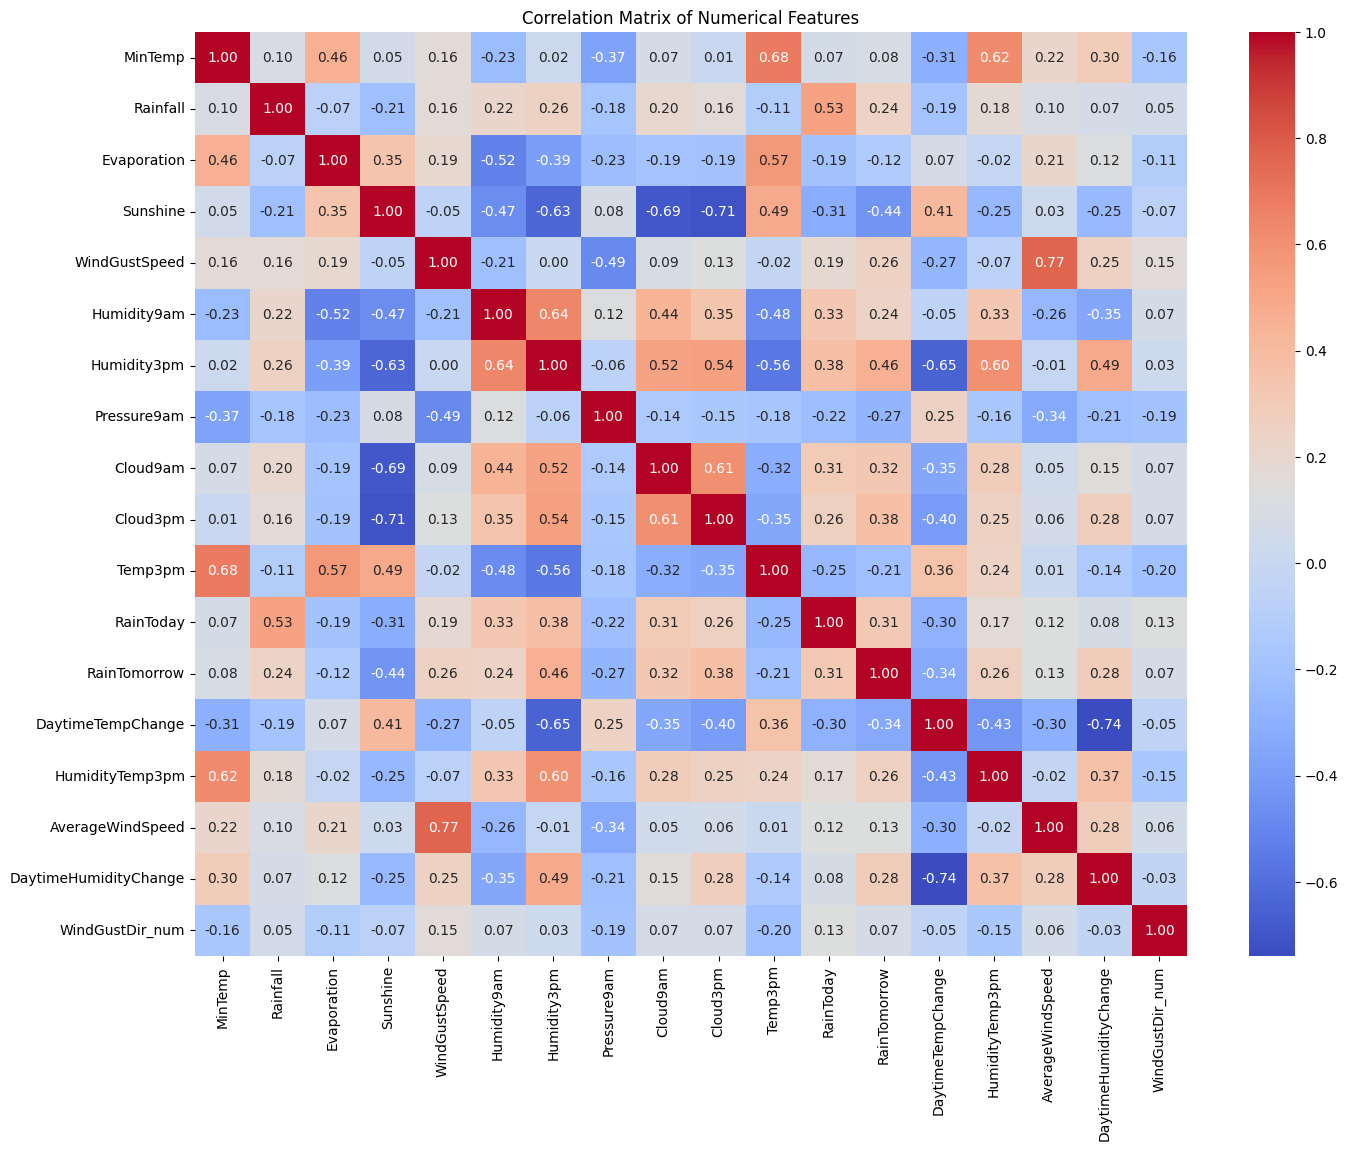

                        MinTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  Pressure9am  Cloud9am  Cloud3pm   Temp3pm  RainToday  RainTomorrow  DaytimeTempChange  HumidityTemp3pm  AverageWindSpeed  DaytimeHumidityChange  WindGustDir_num
MinTemp                1.000000  0.096510     0.457483  0.053477       0.163349    -0.232420     0.021193    -0.372295  0.071455  0.006876  0.682041   0.065077      0.084001          -0.310338         0.620332          0.216530               0.296668        -0.158665
Rainfall               0.096510  1.000000    -0.069284 -0.210261       0.160382     0.217506     0.258283    -0.178761  0.202290  0.162473 -0.108617   0.527639      0.244867          -0.188713         0.179608          0.097407               0.068901         0.054022
Evaporation            0.457483 -0.069284     1.000000  0.351482       0.194751    -0.521304    -0.392778    -0.226294 -0.188185 -0.193911  0.569842  -0.191368     -0.122146           0.070618    

In [41]:
correlation_matrix = train_val_data_reduced.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()
text = correlation_matrix.to_string()
print(text)

3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

Για να χειριστούμε τις απουσιάζουσες τιμές, κατασκευάζουμε δέντρα αποφάσεων για με τα υπόλοιπα χαρακτηριστικά. Η διαδικασία αυτή, αν και έχει μεγαλύτερο υπολογιστικό κόστος, παρέχει γενικά καλύτερα αποτελέσματα. Πρώτα πρέπει να πραγματοποιήσουμε κατάλληλη μετατροπή των κατηγορικών μεταβλητών.


In [42]:
missing_values = train_val_data_reduced.isnull().sum()

missing_values_dict = missing_values.to_dict()

dict(list(missing_values_dict.items()))



{'Location': 0,
 'MinTemp': 160,
 'Rainfall': 0,
 'Evaporation': 20384,
 'Sunshine': 22997,
 'WindGustSpeed': 3093,
 'Humidity9am': 558,
 'Humidity3pm': 1259,
 'Pressure9am': 4780,
 'Cloud9am': 17890,
 'Cloud3pm': 18981,
 'Temp3pm': 913,
 'RainToday': 0,
 'RainTomorrow': 0,
 'DaytimeTempChange': 1056,
 'HumidityTemp3pm': 1259,
 'AverageWindSpeed': 952,
 'DaytimeHumidityChange': 1444,
 'WindGustDir_num': 3121}

3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [43]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

rain_tomorrow = train_val_data_reduced['RainTomorrow']
train_val_data_reduced_without_target = train_val_data_reduced.drop('RainTomorrow', axis=1)

numerical_cols = train_val_data_reduced_without_target.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_val_data_reduced_without_target.select_dtypes(include=['object', 'category']).columns.tolist()

ohe = OneHotEncoder(handle_unknown='ignore')
encoded_categorical_data = ohe.fit_transform(train_val_data_reduced_without_target[categorical_cols])

encoded_categorical_df = pd.DataFrame(encoded_categorical_data.toarray(), columns=ohe.get_feature_names_out(categorical_cols))

combined_data = pd.concat([train_val_data_reduced_without_target[numerical_cols], encoded_categorical_df], axis=1)

decision_tree_model = DecisionTreeRegressor(max_depth=15)
mice_imputer = IterativeImputer(estimator=decision_tree_model, max_iter=100, random_state=0,tol = 0.01)
imputed_data = mice_imputer.fit_transform(combined_data)

imputed_df = pd.DataFrame(imputed_data, columns=combined_data.columns)

scaler = StandardScaler()
imputed_df[numerical_cols] = scaler.fit_transform(imputed_df[numerical_cols])

imputed_df['RainTomorrow'] = rain_tomorrow.reset_index(drop=True)

imputed_df.head()

train_val_data_transformed_df = imputed_df


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

In [44]:
statistical_summary = train_val_data_transformed_df.describe()
statistical_summary


,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,...,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,RainTomorrow
count,4.842300e+04,4.842300e+04,4.842300e+04,4.842300e+04,4.842300e+04,4.842300e+04,4.842300e+04,4.842300e+04,4.842300e+04,4.842300e+04,...,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000,48423.000000
mean,3.756457e-17,3.521679e-18,1.126937e-16,-7.043358e-17,1.279543e-16,-1.408672e-16,-1.878229e-16,-6.949446e-16,1.267804e-16,-3.099077e-16,...,0.020507,0.010367,0.020920,0.018669,0.021085,0.016955,0.020734,0.021353,0.021560,0.228383
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,0.141727,0.101290,0.143117,0.135354,0.143669,0.129103,0.142494,0.144561,0.145243,0.419795
min,-3.114444e+00,-3.007282e-01,-1.373360e+00,-1.908748e+00,-2.285013e+00,-3.760418e+00,-2.620316e+00,-5.369403e+00,-1.481877e+00,-1.660176e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.866675e-01,-3.007282e-01,-6.659461e-01,-8.118092e-01,-6.338502e-01,-6.197357e-01,-6.865796e-01,-6.190277e-01,-1.133982e+00,-9.935942e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-5.907899e-02,-3.007282e-01,-1.774518e-01,2.131426e-01,-1.313224e-01,7.227902e-02,7.582114e-03,3.270062e-02,1.616296e-01,2.209754e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.676025e-01,-1.922889e-01,4.446009e-01,8.610218e-01,5.147849e-01,7.642937e-01,6.521608e-01,6.781185e-01,9.533919e-01,9.734359e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.128410e+00,4.998799e+01,2.074940e+01,1.985384e+00,6.257960e+00,1.562772e+00,2.337982e+00,3.160996e+00,1.649183e+00,1.349666e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [45]:

X = train_val_data_transformed_df.iloc[:, :-1]
y = train_val_data_transformed_df.iloc[:, -1]

print(y)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


0        0.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
48418    0.0
48419    0.0
48420    0.0
48421    0.0
48422    0.0
Name: RainTomorrow, Length: 48423, dtype: float64
Shape of X: (48423, 66)
Shape of y: (48423,)


3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [46]:
from sklearn.model_selection import train_test_split



X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)


Training set shape: (33896, 66) (33896,)
Validation set shape: (14527, 66) (14527,)


### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "MLP Classifier": MLPClassifier(max_iter=1000),
    "Support Vector Classifier": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    print(f"Classifier: {name}")
    print("Training set samples:")
    print(X_train.head())
    print("Training set labels:")
    print(y_train.head())
    print("\n")


Classifier: Naive Bayes
Training set samples:
        MinTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  Humidity9am  \
1197   1.526408 -0.300728     0.655625  0.750471       0.012257     0.231975   
35300 -1.083039 -0.300728    -0.344394  0.888445      -1.064588     0.338439   
7769   0.783211 -0.165179    -0.087153  0.230282       0.371205     0.019047   
36279  1.245645 -0.300728     1.520606  0.285129      -0.399529     0.125511   
15501 -0.240749 -0.300728     0.041468 -1.250585       0.371205    -0.726199   

       Humidity3pm  Pressure9am  Cloud9am  Cloud3pm  ...  Location_Townsville  \
1197     -0.339499    -0.459716 -0.744846  0.220975  ...                  0.0   
35300    -0.636997     1.698228 -1.481877 -1.660176  ...                  0.0   
7769      1.197574     1.205812 -0.786086  0.973436  ...                  0.0   
36279    -1.727822     0.220978  0.605496 -1.283946  ...                  0.0   
15501     0.057165     1.133397  1.301288  0.973436  ...            

4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [48]:
predictions = {}

for name, clf in classifiers.items():
    predictions[name] = clf.predict(X_val)
    print(f"Predictions for classifier: {name}")
    print(predictions[name])
    print("\n")


Predictions for classifier: Naive Bayes
[1. 0. 1. ... 0. 0. 0.]


Predictions for classifier: K-Nearest Neighbors
[0. 1. 1. ... 0. 0. 0.]


Predictions for classifier: Logistic Regression
[0. 1. 1. ... 0. 0. 0.]


Predictions for classifier: MLP Classifier
[0. 1. 1. ... 0. 0. 0.]


Predictions for classifier: Support Vector Classifier
[0. 1. 1. ... 0. 0. 0.]


Predictions for classifier: Decision Tree
[0. 0. 0. ... 0. 0. 0.]


Predictions for classifier: Random Forest
[0. 1. 1. ... 0. 0. 0.]





4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [49]:
from sklearn.metrics import f1_score

f1_scores = {}

for name, predictions in predictions.items():
    f1 = f1_score(y_val, predictions, average='binary')
    f1_scores[name] = f1
    print(f"F1 Score for classifier {name}: {f1:.4f}")


F1 Score for classifier Naive Bayes: 0.5168
F1 Score for classifier K-Nearest Neighbors: 0.6024
F1 Score for classifier Logistic Regression: 0.6227
F1 Score for classifier MLP Classifier: 0.6331
F1 Score for classifier Support Vector Classifier: 0.6231
F1 Score for classifier Decision Tree: 0.5361
F1 Score for classifier Random Forest: 0.6150


4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


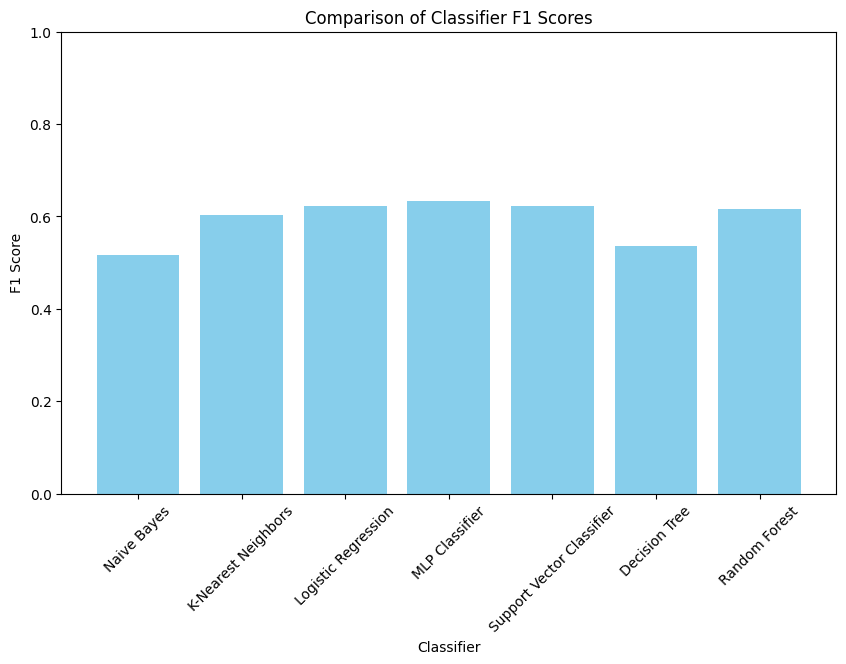

In [50]:
import matplotlib.pyplot as plt

model_names = list(f1_scores.keys())
f1_scores_values = list(f1_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores_values, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('Comparison of Classifier F1 Scores')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.show()


### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το σύνολο εκπαίδευσης [test set](https://drive.google.com/file/d/18PMqdPSuJ4CurrzYlahooNMJWZ_8n11o/view?usp=sharing).


---



In [51]:

file_path = '/content/drive/My Drive/test-2.csv'

test_data = pd.read_csv(file_path)


test_data.drop('Date', axis=1, inplace=True)

test_data_reduced = test_data.drop(columns=['MaxTemp', 'Pressure3pm'])


test_data_reduced['DaytimeTempChange'] = test_data['Temp3pm'] - test_data['Temp9am']
test_data_reduced['HumidityTemp3pm'] = test_data_reduced['Humidity3pm'] * test_data_reduced['Temp3pm']
test_data_reduced['AverageWindSpeed'] = (test_data['WindSpeed3pm'] + test_data['WindSpeed9am'])/2
test_data_reduced['DaytimeHumidityChange'] = test_data['Humidity3pm'] - test_data['Humidity9am']
test_data_reduced.drop(columns=['Temp9am','WindSpeed3pm','WindSpeed9am'],inplace = True)

test_data_reduced['WindGustDir_num'] = test_data_reduced['WindGustDir'].map(wind_dir_map)

test_data_reduced.drop(columns=['WindDir9am', 'WindDir3pm','WindGustDir'],inplace =True)


test_data_reduced.head()



,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,DaytimeTempChange,HumidityTemp3pm,AverageWindSpeed,DaytimeHumidityChange,WindGustDir_num
0,Albury,14.6,0.0,NaN,NaN,37.0,56.0,30.0,1014.8,3.0,1.0,29.0,0,10.9,870.0,11.5,-26.0,45.0
1,Albury,10.7,0.0,NaN,NaN,63.0,44.0,27.0,1008.2,2.0,NaN,18.9,0,-1.6,510.3,28.5,-17.0,270.0
2,Albury,5.7,0.0,NaN,NaN,17.0,68.0,39.0,1025.2,NaN,NaN,20.9,0,8.7,815.1,6.5,-29.0,112.5
3,Albury,10.6,0.0,NaN,NaN,39.0,74.0,86.0,1008.9,8.0,8.0,15.1,0,0.2,1298.6,5.5,12.0,292.5
4,Albury,3.7,0.0,NaN,NaN,19.0,87.0,51.0,1023.6,NaN,NaN,18.9,0,11.5,963.9,5.5,-36.0,157.5


5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [54]:


numerical_cols = test_data_reduced.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = test_data_reduced.select_dtypes(include=['object', 'category']).columns.tolist()

ohe = OneHotEncoder(handle_unknown='ignore')
encoded_categorical_data = ohe.fit_transform(test_data_reduced[categorical_cols])

encoded_categorical_df = pd.DataFrame(encoded_categorical_data.toarray(), columns=ohe.get_feature_names_out(categorical_cols))

combined_data = pd.concat([test_data_reduced[numerical_cols], encoded_categorical_df], axis=1)

decision_tree_model = DecisionTreeRegressor(max_depth=15)
mice_imputer = IterativeImputer(estimator=decision_tree_model, max_iter=100, random_state=0,tol = 0.01)
imputed_data = mice_imputer.fit_transform(combined_data)

imputed_df = pd.DataFrame(imputed_data, columns=combined_data.columns)

scaler = StandardScaler()
imputed_df[numerical_cols] = scaler.fit_transform(imputed_df[numerical_cols])


imputed_df.head()

test_data_transformed_df = imputed_df

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [55]:
remaining_missing_values = test_data_transformed_df.isnull().sum().any()

remaining_missing_values


False

In [56]:
best_model = classifiers["MLP Classifier"]
predictions_test = best_model.predict(test_data_transformed_df)


In [57]:
submission_df = pd.DataFrame({
    'id': test_data.index + 1,
    'RainTomorrow': predictions_test
})

submission_csv_path = '/content/drive/My Drive/submission.csv'
submission_df.to_csv(submission_csv_path, index=False)

submission_csv_path


'/content/drive/My Drive/submission.csv'

### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

In [58]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

param_grids = {
    'GaussianNB': {
        'var_smoothing': np.logspace(-9, -6, num=10)
    },
    'KNeighborsClassifier': {
        'n_neighbors': [5, 20, 50],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'LogisticRegression': {
        'C': np.logspace(-3, 3, 5),
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'sag']
    },
    'MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100,)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [1e-4, 1e-3, 1e-2, 1e-1],
        'learning_rate_init': [0.001, 0.01, 0.1],
        'max_iter': [200, 300, 500],
        'batch_size': [64, 128, 256]
    },
    'SVC': {
        'C': np.logspace(-2, 2, 5),
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto', 1e-3, 1e-2, 1e-1, 1],
        'degree': [3, 4, 5],
        'coef0': [-1, 0, 1],
        'shrinking': [True, False]
    },
    'DecisionTreeClassifier': {
        'max_depth': [10, 100, 200],
        'min_samples_split': [2, 5, 10]
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 150],
        'max_depth': [10, 100, 200],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2'],
        'min_impurity_decrease': [0.0, 0.01, 0.1],
        'bootstrap': [True, False]
    }
}





6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [59]:
from sklearn.model_selection import RandomizedSearchCV

best_estimators = {}
f1_scorer = make_scorer(f1_score, average='binary')
cv_folds = 5
n_iter_search = 20

for classifier_name, params in param_grids.items():
    classifier = eval(classifier_name)()
    random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=n_iter_search, cv=cv_folds, scoring=f1_scorer, n_jobs=-1)
    random_search.fit(X_train, y_train)

    best_estimators[classifier_name] = random_search.best_estimator_
    print(f"Best params for {classifier_name}: {random_search.best_params_}")
    print(f"Best cross-validated f1 score: {random_search.best_score_}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for GaussianNB: {'var_smoothing': 1e-09}
Best cross-validated f1 score: 0.5097442726556011


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for KNeighborsClassifier: {'weights': 'distance', 'n_neighbors': 20, 'metric': 'euclidean'}
Best cross-validated f1 score: 0.5910120076600355


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for LogisticRegression: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 31.622776601683793}
Best cross-validated f1 score: 0.6126043400910005


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best params for MLPClassifier: {'solver': 'sgd', 'max_iter': 200, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (50,), 'batch_size': 64, 'alpha': 0.001, 'activation': 'relu'}
Best cross-validated f1 score: 0.6337558279790683
Best params for SVC: {'shrinking': False, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'coef0': 0, 'C': 10.0}
Best cross-validated f1 score: 0.6205295232346221


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best params for DecisionTreeClassifier: {'min_samples_split': 2, 'max_depth': 10}
Best cross-validated f1 score: 0.5744806741178224
Best params for RandomForestClassifier: {'n_estimators': 100, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_features': 'log2', 'max_depth': 100, 'bootstrap': False}
Best cross-validated f1 score: 0.6026854676689736



6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [60]:
predictions = {}

for classifier_name, classifier in best_estimators.items():
    predictions[classifier_name] = classifier.predict(X_val)

for classifier_name, pred in predictions.items():
    print(f"Predictions by {classifier_name}:")
    print(pred)


Predictions by GaussianNB:
[1. 0. 1. ... 0. 0. 0.]
Predictions by KNeighborsClassifier:
[0. 1. 1. ... 0. 0. 0.]
Predictions by LogisticRegression:
[0. 1. 1. ... 0. 0. 0.]
Predictions by MLPClassifier:
[0. 1. 1. ... 0. 0. 0.]
Predictions by SVC:
[0. 1. 1. ... 0. 0. 0.]
Predictions by DecisionTreeClassifier:
[0. 1. 1. ... 0. 0. 0.]
Predictions by RandomForestClassifier:
[0. 1. 1. ... 0. 0. 0.]


In [61]:
from sklearn.metrics import f1_score

f1_scores = {}
for classifier_name, pred in predictions.items():
    f1 = f1_score(y_val, pred, average='binary')
    f1_scores[classifier_name] = f1
    print(f"F1 score for {classifier_name}: {f1:.4f}")


F1 score for GaussianNB: 0.5168
F1 score for KNeighborsClassifier: 0.6023
F1 score for LogisticRegression: 0.6231
F1 score for MLPClassifier: 0.6510
F1 score for SVC: 0.6398
F1 score for DecisionTreeClassifier: 0.5866
F1 score for RandomForestClassifier: 0.6226


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


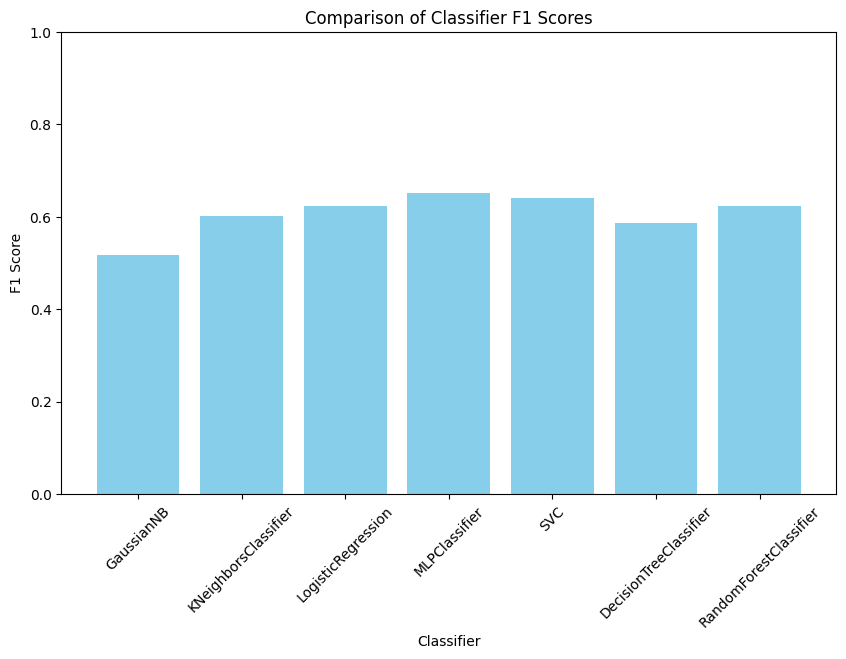

In [62]:
import matplotlib.pyplot as plt

model_names = list(f1_scores.keys())
f1_scores_values = list(f1_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores_values, color='skyblue')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('Comparison of Classifier F1 Scores')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.show()


### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [63]:
best_classifier_name = max(f1_scores, key=f1_scores.get)
best_classifier = best_estimators[best_classifier_name]

X_full_train = np.concatenate((X_train, X_val))
y_full_train = np.concatenate((y_train, y_val))

best_classifier.fit(X_full_train, y_full_train)





/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.001, batch_size=64, hidden_layer_sizes=(50,),
              solver='sgd')

In [64]:
arr = test_data_transformed_df.values
test_predictions = best_classifier.predict(arr)

print(f"Predictions on the test set by the best classifier ({best_classifier_name}):")
print(test_predictions)



Predictions on the test set by the best classifier (MLPClassifier):
[0. 0. 0. ... 0. 0. 0.]


7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [65]:
submission_df = pd.DataFrame({
    'id': test_data.index + 1,
    'RainTomorrow': test_predictions
})

submission_csv_path = '/content/drive/My Drive/submission.csv'
submission_df.to_csv(submission_csv_path, index=False)

submission_csv_path

'/content/drive/My Drive/submission.csv'